In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer # For filling the null values
import seaborn as sns # For heatmaps of Spearman Correlation 

In [3]:
df = pd.read_csv('./AFG E-Gov Barriers Data.csv')

In [3]:
df.columns

Index(['NO', 'Gender', 'Age', 'Government Organization', 'Education',
       'Position', 'St1', 'St2', 'St3', 'St4', 'St5', 'St6', 'TI1', 'TI2',
       'TI3', 'TI4', 'TI5', 'TI6', 'TI7', 'TI8', 'TI9', 'PL1', 'PL2', 'PL3',
       'PL4', 'PL5', 'OC1', 'OC2', 'OC3', 'OC4', 'OC5', 'OC6', 'OC7', 'OC8',
       'OC9', 'OPC1', 'OPC2', 'OPC3'],
      dtype='object')

<br>The dataset and survey questionnaire is grounded on a comprehensive literature review and
the study of definitions. A final set of 32 items was designed
for the questionnaire and organized according to the five
major types of E-Gov barrier. In the interest of comprehension, the
questionnaire was presented in both English and Dari, with a
pilot study being deployed among 35 respondents to validate
the clarity and comprehensibility of the survey questions.
Respondents were also asked for their opinions on the degree
to which the questionnaire items were explicit and the degree
to which they were appropriate to determine the aspects for
which they were intended. Furthermore, Correlation Analysis
(Pearson) has been deployed as well, where we check If
Sig. < 0,05 D valid, If Sig. > 0,05 D not valid and delete
the survey items. In line with the answers of respondents to
the pilot study, all survey items were validated and were thus
retained for the final study. The resulting final questionnaire
was separated into six sections: questions of demographics,
barriers to strategy, policy and legal barriers, technological
and IT infrastructure barriers, organizational and cultural barriers,
and operational cost barriers of E-Gov implementation
in Afghanistan.

Each row, or sample, consists of the following variables:

**The first section contains five demographic and profile characteristics:**
* **Gender:** Gender of survey participant 
* **Age:** Age of survey participant
* **Organization:** afliate organization (all were public sector government institutions)
* **Education:** Survey participants level of education (e.g. Diploma, Bachelor, Master, PhD)
* **Position:** Survey participant job title or position within the public sector organization

**Strategy (St) Barriers to E-Gov in Afghanistan:**
* **St1:** Absence of implementation guidance
* **St2:** Unclear vision and management strategy
* **St3:** Over-ambitious E-Gov milestones
* **St4:** Lack of shared E-Gov goals and objectives
* **St5:** Lack of ownership and governance
* **St6:** Funding issues and centralization of funding for government agencies

**Technological & IT infrastructure (TI) Barriers to E-Gov in Afghanistan:**
* **TI1:** Lack of architecture interoperability and systems integration
* **TI2:** Different security models
* **TI3:** Inflexibility of legacy systems
* **TI4:** Incompatible of technical and data standards
* **TI5:** Privacy and security issues such as online theft and fraud
* **TI6:** Shortage of reliable networks and low bandwidth
* **TI7:** Inadequate security of government hardware and software
* **TI8:** Unauthorized external and internal access to information system
* **TI9:** Lack of open source software and standards

**Policy & legal (PL) Barriers to E-Gov in Afghanistan:**
* **PL1:** Lack of legal bases and comprehensive policy
* **PL2:** Lack of security rules, policies and privacy law
* **PL3:** Data ownership conflicts
* **PL4:** Lack of political commitment and coordination
* **PL5:** Digital divide

**Organizational & cultural (OC) Barriers to E-Gov in Afghanistan:**
* **OC1:** Lack of relevant in-house management and IT skills
* **OC2:** Complexity of reengineering government processes and procedures
* **OC3:** Lack of knowledge for security risks
* **OC4:** Slow pace of government reform
* **OC5:** Lack of agency readiness
* **OC6:** Lack of cooperation and coordination between government agencies
* **OC7:** Lack of effective leadership support
* **OC8:** Pervasive corruption in government entities
* **OC9:** Resistance to change

**Operational Cost (OPC) Barriers to E-Gov in Afghanistan:**
* **OPC1:** Cost of installation, operation and maintenance of E-Gov system
* **OPC2:** Cost of training, IT professional and consultants
* **OPC3:** Shortage of financial resources in public sector


In [4]:
df.head(10)

,NO,Gender,Age,Government Organization,Education,Position,St1,St2,St3,St4,...,OC3,OC4,OC5,OC6,OC7,OC8,OC9,OPC1,OPC2,OPC3
0,1,Male,31-40,Ministry of Justice,N.A.,Director,5,5,5,4,...,5,4,4,2,3,1,4,5.0,3,4
1,2,Male,31-40,Ministry of Justice,Bachelor,Head of Supervision,5,4,4,4,...,3,3,5,4,5,2,2,5.0,4,5
2,3,Female,31-40,Ministry of Justice,Bachelor,Technical Expert,5,5,4,4,...,4,4,4,3,2,2,2,4.0,4,5
3,4,Female,32-41,Ministry of Justice,Bachelor,Officer of Human Rights,4,3,4,4,...,3,3,3,2,4,2,2,4.0,4,4
4,5,Female,N.A.,Ministry of Justice,Bachelor,Executive Director,4,3,2,4,...,4,3,4,N.A.,3,2,3,3.0,2,2
5,6,Male,21-30,Ministry of Justice,Master,Member of Civil Audit Directorate,4,2,4,4,...,4,4,3,2,4,4,1,3.0,5,5
6,7,Female,31-40,Ministry of Justice,PhD,Director,4,3,4,5,...,4,4,4,3,2,2,2,4.0,4,3
7,8,Female,31-40,Ministry of Justice,PhD,Member of Provincial Oversight,3,4,4,5,...,2,2,3,2,4,4,3,3.0,3,3
8,9,Male,31-40,Ministry of Justice,Bachelor,Member of Secretariat,4,3,3,4,...,3,4,3,4,3,2,2,2.0,2,2
9,10,Female,Above 41,Ministry of Justice,Bachelor,Member of Civil Right,4,1,2,4,...,3,3,3,3,3,3,3,2.0,2,2


***Selecting the colunms relevant to the financial barriers of E-Government/public information system implemenation in Afghanistan.***

**Operational Cost (OPC) Barriers to E-Gov in Afghanistan:**
* **OPC1:** Cost of installation, operation and maintenance of E-Gov system
* **OPC2:** Cost of training, IT professional and consultants
* **OPC3:** Shortage of financial resources in public sector

In [5]:
#Selecting the colunms relevant to the financial barriers of 
#E-Government/public information system implemenation in Afghanistan.
data = df[['OPC1','OPC2','OPC3']]

In [6]:
data.head()

,OPC1,OPC2,OPC3
0,5.0,3,4
1,5.0,4,5
2,4.0,4,5
3,4.0,4,4
4,3.0,2,2


In [7]:
#finding null values within the relevant colunms of our dataset.

In [8]:
bool_series_OPC1 = pd.isnull(data["OPC1"])

In [9]:
data[bool_series_OPC1]

,OPC1,OPC2,OPC3
108,NaN,1,1
235,NaN,4,5
378,NaN,5,3


In [10]:
bool_series_OPC2 = pd.isnull(data["OPC2"])

In [11]:
data[bool_series_OPC2]

,OPC1,OPC2,OPC3


In [12]:
bool_series_OPC3 = pd.isnull(data["OPC3"])

In [13]:
data[bool_series_OPC3]

,OPC1,OPC2,OPC3


To avoid underestimation of individual scores, the missing values have been handled through item mean substitution (IMS). IMS is an effective representation of the original data if the missing values are equal to or less than 20%, which makes it the ideal imputation technique for our dataset, and clearly based on the above boolean series, missing values are below 12%.

To fill the null values with mean of each colunms scikit learn's library SimpleImputer object has been used.

In [14]:
#we first initialize an instance of the SimpleImputer class by indicating the strategy 
#(mean) as well as specifying the missing values that you want to locate (np.nan).

imputer = SimpleImputer(strategy='mean', missing_values=np.nan)

#Once the instance is created, you use the fit() function to fit the imputer on the column(s) that 
#we want to work on.

imputer = imputer.fit(data[['OPC1']])

#now we use the transform() function to fill the missing values based on the 
#strategy you specified in the initializer of the SimpleImputer class.

data['OPC1'] = imputer.transform(data[['OPC1']])

/var/folders/88/vlrz89sn15jdmcdgfjsnyvjw0000gn/T/ipykernel_85806/2067552833.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['OPC1'] = imputer.transform(data[['OPC1']])


In [15]:
#Making sure that our data doesn't contain any null values:
data.isnull().any()

OPC1    False
OPC2    False
OPC3    False
dtype: bool

Now to avoid the confusion since we are working with likerat scale variables, we will convert all colunms 
from float and int to only integar (int) data type:

In [16]:
data = data.astype(int)

In [17]:
data.head()

,OPC1,OPC2,OPC3
0,5,3,4
1,5,4,5
2,4,4,5
3,4,4,4
4,3,2,2


It's Worth Mentioning that, The survey instrument of the current data was developed using items adopted from
previous studies mainly from 'IS success model'. 

**Hence, the participants were asked to indicate how frequently each statement fits them using 5-Point Likert Scale, wherein 1 indicates Strongly Disagree, 2 Disagree, 3 Normal, 4 Agree, with 5 indicating Strongly Agree.**

Participant's frequency of responses on the quesiton: St6 / Funding issues and centralization of funding for government agencies, as strategy barrier to E-Gov in Afghanistan.

**(5) Strongly Agree = 90** **/** 
**(4) Agree = 116** **/**
**(3) Normal = 106** **/**
**(2) Disagree =   59** **/**
**(1) Strongly Disagree = 16** 

In [18]:
OPC1_data = data['OPC1'].value_counts()
df_OPC1 = pd.DataFrame(OPC1_data)
df_OPC1.head()

,OPC1
3,146
4,100
2,67
5,38
1,36


Participant's frequency of responses on the quesiton: OPC1 / Cost of installation, operation and maintenance of E-Gov system, as an operational cost barrier to E-Gov in Afghanistan.

**(5) Strongly Agree = 38** **/** 
**(4) Agree = 100** **/**
**(3) Normal = 146** **/**
**(2) Disagree = 67** **/**
**(1) Strongly Disagree = 36** 

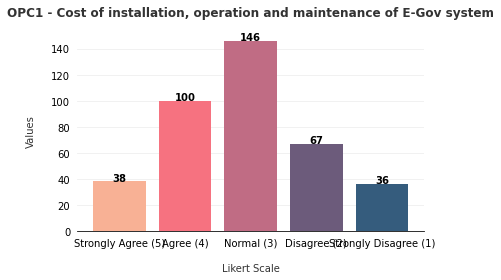

In [19]:
x=['Strongly Agree (5)','Agree (4)','Normal (3)','Disagree (2)','Strongly Disagree (1)']
y=[38,100,146,67,36]

fig, ax = plt.subplots()
# Set default figure size.
plt.rcParams['figure.figsize'] = (8, 5)



bars = plt.bar(x,y,color=['#F8B195', '#F67280', '#C06C84', '#6C5B7B', '#355C7D'])

#plt.xticks(rotation=0)


# Here we remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart, except for bottom
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
#---------------------------------------
# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)
#---------------------------------------
# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
#------------------------------------
# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      weight='bold'
  )

# Add labels and a title. Note the use of `labelpad` and `pad` to add some
# extra space between the text and the tick labels.
ax.set_xlabel('Likert Scale', labelpad=15, color='#333333')
ax.set_ylabel('Values', labelpad=15, color='#333333')
ax.set_title('OPC1 - Cost of installation, operation and maintenance of E-Gov system', pad=15, color='#333333',
             weight='bold')


fig.tight_layout()

In [20]:
OPC2_data = data['OPC2'].value_counts()
df_OPC2 = pd.DataFrame(OPC2_data)
df_OPC2.head()

,OPC2
3,116
4,97
2,80
5,47
1,47


Participant's frequency of responses on the quesiton: OPC2 / Cost of training, IT professional and consultants of E-Gov system as an operational cost barrier to E-Gov in Afghanistan.

**(5) Strongly Agree = 47** **/** 
**(4) Agree = 97** **/**
**(3) Normal = 116** **/**
**(2) Disagree = 47** **/**
**(1) Strongly Disagree = 47** 

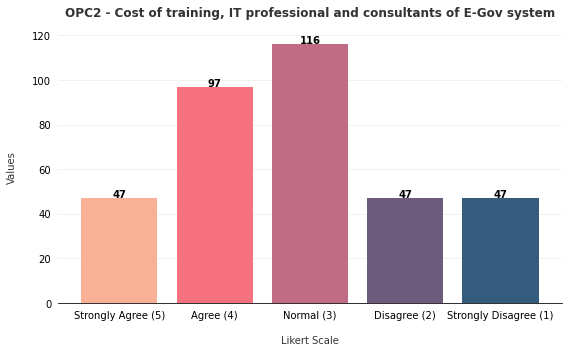

In [21]:
x=['Strongly Agree (5)','Agree (4)','Normal (3)','Disagree (2)','Strongly Disagree (1)']
y=[47,97,116,47,47]

fig, ax = plt.subplots()
# Set default figure size.
plt.rcParams['figure.figsize'] = (8, 5)



bars = plt.bar(x,y,color=['#F8B195', '#F67280', '#C06C84', '#6C5B7B', '#355C7D'])

#plt.xticks(rotation=0)


# Here we remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart, except for bottom
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
#---------------------------------------
# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)
#---------------------------------------
# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
#------------------------------------
# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      weight='bold'
  )

# Add labels and a title. Note the use of `labelpad` and `pad` to add some
# extra space between the text and the tick labels.
ax.set_xlabel('Likert Scale', labelpad=15, color='#333333')
ax.set_ylabel('Values', labelpad=15, color='#333333')
ax.set_title('OPC2 - Cost of training, IT professional and consultants of E-Gov system', pad=15, color='#333333',
             weight='bold')


fig.tight_layout()

In [22]:
OPC3_data = data['OPC3'].value_counts()
df_OPC3 = pd.DataFrame(OPC3_data)
df_OPC3.head()

,OPC3
3,112
2,75
4,72
5,65
1,63


Participant's frequency of responses on the quesiton: OPC3 / Shortage of financial resources in public sector for E-Gov systems as an operational cost barrier to E-Gov in Afghanistan.

**(5) Strongly Agree = 65** **/** 
**(4) Agree = 72** **/**
**(3) Normal = 112** **/**
**(2) Disagree = 75** **/**
**(1) Strongly Disagree = 63** 

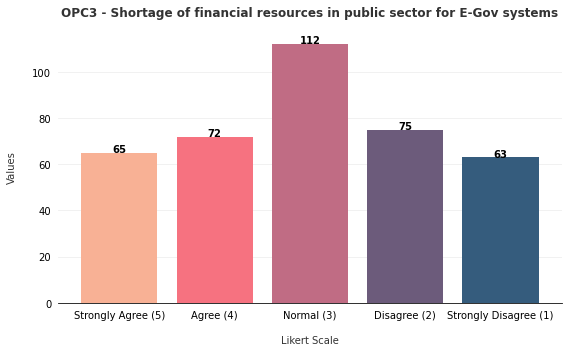

In [23]:
x=['Strongly Agree (5)','Agree (4)','Normal (3)','Disagree (2)','Strongly Disagree (1)']
y=[65,72,112,75,63]

fig, ax = plt.subplots()
# Set default figure size.
plt.rcParams['figure.figsize'] = (8, 5)



bars = plt.bar(x,y,color=['#F8B195', '#F67280', '#C06C84', '#6C5B7B', '#355C7D'])

#plt.xticks(rotation=0)


# Here we remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart, except for bottom
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
#---------------------------------------
# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)
#---------------------------------------
# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
#------------------------------------
# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      weight='bold'
  )

# Add labels and a title. Note the use of `labelpad` and `pad` to add some
# extra space between the text and the tick labels.
ax.set_xlabel('Likert Scale', labelpad=15, color='#333333')
ax.set_ylabel('Values', labelpad=15, color='#333333')
ax.set_title('OPC3 - Shortage of financial resources in public sector for E-Gov systems', pad=15, color='#333333',
             weight='bold')


fig.tight_layout()

In [24]:
#For statistical analysis here we will use the Spearman Rank Correlation to find the relationship between
#the variables of the dataset, or in simple term between the answers of the survey respondents.

In [25]:
Data_Cor = data.corr(method="spearman")
print(Data_Cor)

          OPC1      OPC2      OPC3
OPC1  1.000000  0.626577  0.571430
OPC2  0.626577  1.000000  0.649727
OPC3  0.571430  0.649727  1.000000


Text(0.5, 1.0, 'Spearman Correlation Analysis Heatmap')

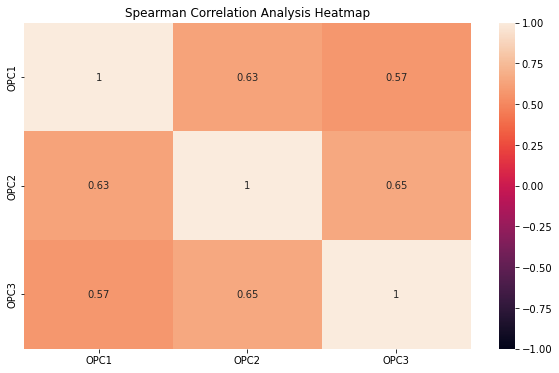

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(Data_Cor, vmin=-1,vmax=1, annot=True)
plt.title("Spearman Correlation Analysis Heatmap")